# Turbulence example

In this notebook we show how to perform a simulation using a soundspeed field based on a Gaussian turbulence spectrum.

In [1]:
import numpy as np
from pstd import PSTD, PML, Medium, Position2D, PointSource
from pstd import PSTD
from acoustics import Signal
import seaborn as sns
%matplotlib inline

## Configuration

The following are the parameters for our simulation

In [2]:
x = 30.0
y = 20.0
z = 0.0

c = 343.2
maximum_frequency_target = 200.0

## Create model

We now create a model. Waves propagate in a medium which we define first.

In [3]:
medium = Medium(soundspeed=c, density=1.296)

The model is only finite and to prevent aliasing we need a Perfectly Matched Layer.

In [4]:
pml = PML((1000.0, 1000.0), depth=10.0)

Now we create the actual model.

In [5]:
model = PSTD(maximum_frequency=maximum_frequency_target, pml=pml, medium=medium, cfl=0.05, size=[x, y])

In this example our source excites a pulse. 

In [6]:
source_position = Position2D(x/4.0, y/2.0)

source = model.addObject('source', 'PointSource', position=source_position, 
                         excitation='pulse', quantity='pressure', amplitude=0.1)

We also add a receiver on the other side of the domain

In [7]:
receiver_position = Position2D(x*3.0/4.0, y/2.0)

receiver = model.addObject('receiver', 'Receiver', position=receiver_position, quantity='pressure')

## Check model

To get a quick overview of all parameters, for example to check them, we can print one

In [8]:
print(model.overview())

Model timestep: 0.000125 
Maximum frequency: 200.0
Grid spacing: 0.858
Grid shape: (59, 48)
Grid shape without PML: (35, 24)
Grid shape with PML: (59, 48)
PML nodes: 12
PML depth target: 10.00
PML depth actual: 10.30
Grid size: (50.622, 41.183999999999997)
Grid size without PML: (30.030000000000001, 20.591999999999999)
Grid size with PML: (50.622, 41.183999999999997)
Amount of sources: 1
Amount of receivers: 1



To check whether the geometry is as we want it to be, we can simply draw it.

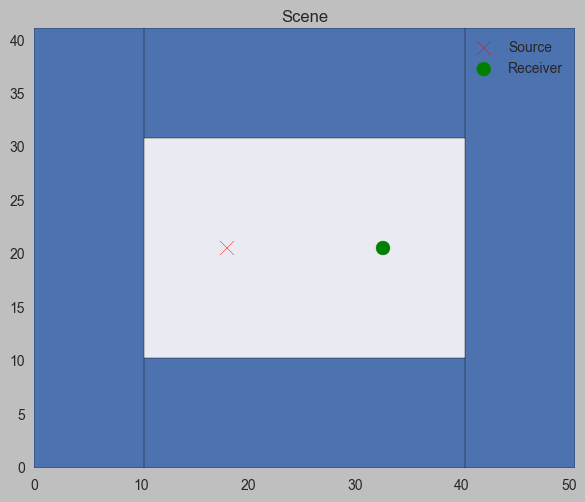

In [9]:
_ = model.plot_scene()

## Running the simulation

Now that we've defined and checked our model we can run it.

With `model.run()` you can specify the amount of time steps or amount of seconds it should run.

In [10]:
model.run(steps=10)

Let's see how the sound pressure field looks like now.

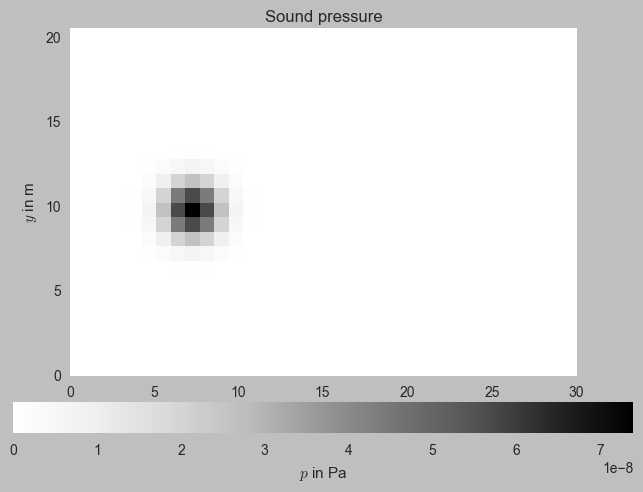

In [11]:
_ = model.plot_field()

It might happen that you realize that you actually need to calculate a bit further. This can easily be done, since the state is remembered. Simply use `model.run()` again and the simulation continues.

In [12]:
model.run(steps=500)

as you can see.

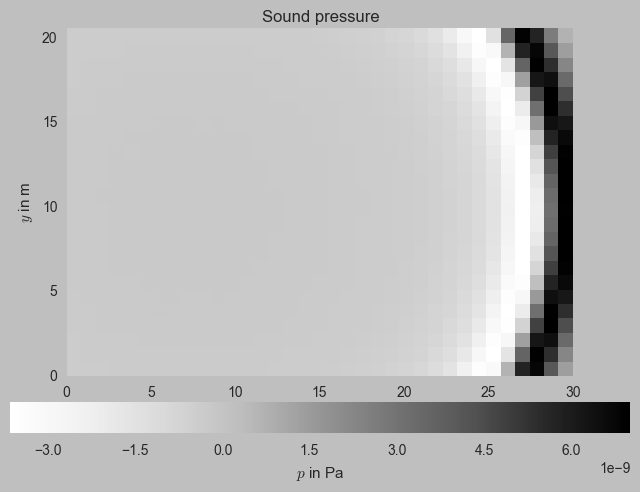

In [13]:
_ = model.plot_field()

We can also check the signal recorded by the receiver, which in this case is the impulse response. The method `receiver.recording()` returns an instance of `acoustics.Signal`.

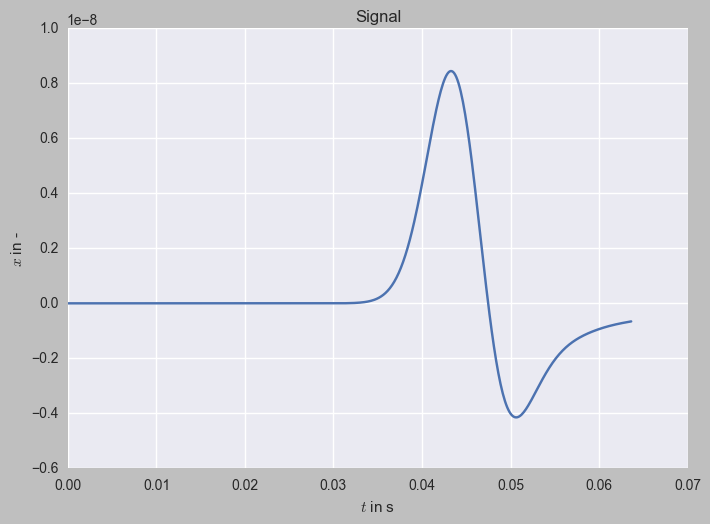

In [14]:
_ = receiver.recording().plot()

If however, you want to restart the simulation you can do so with `model.restart()`.

In [15]:
model.restart()